# Simulace pohybu planety Země a její trajektorie

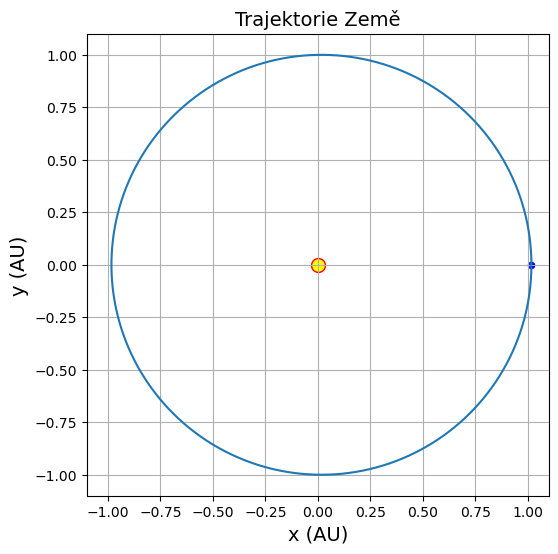

Minimální vzdálenost (r_min): 0.9832 AU
Maximální vzdálenost (r_max): 1.0167 AU
Excentricita (e = (r_max - r_min) / (r_max + r_min)): 0.0168
Relativní změna plošné rychlosti |vp_max - vp_min| / vp_prum: 0.0000 %


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Fyzikální konstanty
Mz = 1.0 # hmotnost Země (jednotky Mz)
Ms = 333166.0 # hmotnost Slunce (v jednotkach Mz)
G = 1.18e-4 # gravitační konstanta (Mz^-1 AU^3 rok^-2)
T = 1 # doba obehu (1 rok)
v0 = 6.166 # pocatecni rychlost Země (AU/rok)
dt = T/10000

# Definice zrychlení
# Pro zrychlení ve směru x
def ax(x, y):
    r_cubed = np.sqrt(x**2 + y**2)**3
    return -G * Ms / r_cubed * x

# Pro zrychlení ve směru y
def ay(x, y):
    r_cubed = np.sqrt(x**2 + y**2)**3
    return -G * Ms / r_cubed * y

# Inicializace polí
t=np.arange(0,T+dt,dt) # pole časů
x=np.empty(np.size(t)) # x-ové souřadnice
y=np.empty(np.size(t)) # y-ové souřadnice
r=np.empty(np.size(t)) # vzdálenost Země od Slunce
vx=np.empty(np.size(t)) # x-ová složka rychlosti
vy=np.empty(np.size(t)) # y-ová složka rychlosti
v=np.empty(np.size(t)) # velikost rychlosti
vp=np.empty(np.size(t)) # plošná rychlost

# Počáteční podmínky
x[0] = 1.0167 # AU (Afélium)
y[0] = 0.0
r[0] = np.sqrt(x[0]**2 + y[0]**2)

# Počáteční rychlost
vx[0] = 0.0
vy[0] = v0 # AU/rok (rychlost v aféliu je kolmá k vektoru pozice)
v[0] = np.sqrt(vx[0]**2 + vy[0]**2)

# Plošná rychlost na začátku (vzorec 0.5 * |x*vy - y*vx|)
vp[0] = 0.5 * np.abs(x[0] * vy[0] - y[0] * vx[0])

rmin = x[0] # do této proměnné uložíme nejmenší vzdálenost Země od Slunce
rmax = 0.0    # do této proměnné uložíme největší vzdálenost Země od Slunce

# Numerická integrace (Euler-Cromer / Semi-implicit Euler)
for i in range(1,np.size(t)):
    
    vx[i] = vx[i-1] + ax(x[i-1], y[i-1])*dt
    vy[i] = vy[i-1] + ay(x[i-1], y[i-1])*dt

    x[i] = x[i-1] + vx[i]*dt
    y[i] = y[i-1] + vy[i]*dt
    
    r[i] = np.sqrt(x[i]**2 + y[i]**2)
    v[i] = np.sqrt(vx[i]**2 + vy[i]**2)
    
    vp[i] = 0.5 * np.abs(x[i] * vy[i] - y[i] * vx[i])

    if r[i]<rmin: # najdeme nejmenší vzdálenost Země od Slunce a uložíme ji do proměnné rmin    
        rmin = r[i]
    if r[i]>rmax: # najdeme největší vzdálenost Země od Slunce a uložíme ji do proměnné rmax 
        rmax = r[i]


# Vykreslení trajektorie
fig,ax=plt.subplots(figsize=(6,6))
plt.title('Trajektorie Země',fontsize=14)
ax.plot(x,y, label='Země')
ax.scatter(0,0,s=100,marker='o',c='yellow', edgecolors='red', label='Slunce')
ax.scatter(x[0],y[0], s=20, c='blue', label='Afélium') # Počáteční bod
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
ax.set_xlabel('x (AU)',fontsize=14)
ax.set_ylabel('y (AU)',fontsize=14)
ax.set_aspect('equal', adjustable='box') # Zajistí, že osy mají stejné měřítko
plt.grid(True)
plt.show()

# Výpis výsledků
print(f"Minimální vzdálenost (r_min): {rmin:.4f} AU")
print(f"Maximální vzdálenost (r_max): {rmax:.4f} AU")
print(f"Excentricita (e = (r_max - r_min) / (r_max + r_min)): {(rmax-rmin)/(rmax+rmin):.4f}")
print(f"Relativní změna plošné rychlosti |vp_max - vp_min| / vp_prum: { (np.max(vp) - np.min(vp)) / np.mean(vp) * 100:.4f} %")